In [114]:
from google.colab import files
uploaded_file = files.upload()

Saving net2.png to net2.png


In [115]:
uploaded_file_name = next(iter(uploaded_file))
print(uploaded_file_name)

net2.png


In [116]:
print("画像ファイルと回転の種類，面の色を指定してください")
while True:
  val = input().split()
  if len(val) != 3:
    print('「file_name rotate color」の形式で入力してください')
  elif val[0] != uploaded_file_name:
    print('指定したファイルはアップロードされていません')
  elif val[1] != 'f' and val[1] != 'r'and val[1] != 'u'and val[1] != 'l'and val[1] != 'b'and val[1] != 'd':
    print('第二引数に回転の種類を指定してください')
  elif val[2] != 'w' and val[2] != 'r'and val[2] != 'o'and val[2] != 'g'and val[2] != 'b'and val[2] != 'y':
    print('第三引数に面の色を指定してください')
  else:
    break;


画像ファイルと回転の種類，面の色を指定してください
net2.png f w


In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(uploaded_file_name)
image = cv2.blur(image,(3,3))

In [118]:
height, width = image.shape[:2]

#画像の端の4点の画素値が黒か判断
#4点とも黒判定の場合、背景は黒として処理
judge_num = 0
if image[0,0][0] < 80 and image[0,0][1] < 80 and image[0,0][2] < 80:
  judge_num = judge_num + 1
if image[0,width - 1][0] < 80 and image[0,width - 1][1] < 80 and image[0,width - 1][2] < 80:
  judge_num = judge_num + 1
if image[height - 1,0][0] < 80 and image[height - 1,0][1] < 80 and image[height - 1,0][2] < 80:
  judge_num = judge_num + 1
if image[height - 1,width - 1][0] < 80 and image[height - 1,width - 1][1] < 80 and image[height - 1,width - 1][2] < 80:
  judge_num = judge_num + 1

In [119]:
lower = np.array([0,0,0])
if judge_num == 4:
  upper = np.array([100,100,100])
  print('背景は黒')
else :
  upper =np.array([70,70,70])
  print('背景は白')
green = cv2.inRange(image,lower,upper)

背景は黒


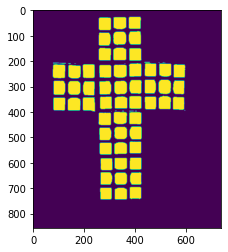

In [120]:
green = cv2.bitwise_not(green)
plt.imshow(green)

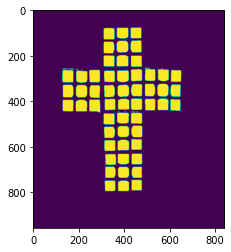

In [121]:
if judge_num == 4:
  green = cv2.copyMakeBorder(green, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[0,0,0])  
plt.imshow(green) 

In [122]:
if judge_num ==4:
  kernelSize = max(1, int(0.01 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.erode(green, kernel) # 収縮
  green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.05 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.dilate(green, kernel) # 膨張
  green = cv2.erode(green, kernel) # 収縮
else:
  green = cv2.bitwise_not(green)
  #kernelSize = max(1, int(0.002 * max(width, height))) * 2 + 1
  #kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  #green = cv2.erode(green, kernel) # 収縮
  #green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.075 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.dilate(green, kernel) # 膨張

  kernelSize = max(1, int(0.085 * max(width, height))) * 2 + 1
  kernel = np.ones((kernelSize, kernelSize), dtype=np.int)
  green = cv2.erode(green, kernel) # 収縮

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

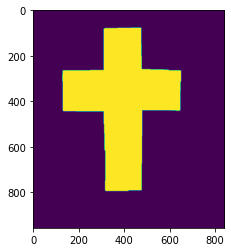

In [123]:
plt.imshow(green)

In [124]:
contours, hierarchy = cv2.findContours(green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [125]:
if judge_num == 4:
  new_image = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[0,0,0])
else:
  new_image = image
#cv2.drawContours(new_image, contours, -1, (255, 0, 0), 2, cv2.LINE_AA)
#plt.imshow(new_image)

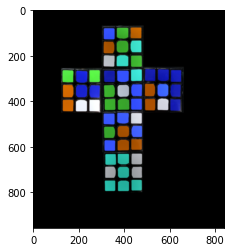

In [126]:
x, y, w, h = cv2.boundingRect(contours[0])
#cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 255, 0), cv2.LINE_4)
plt.imshow(new_image)

In [127]:
# 移動元の4頂点
src = np.array([[x,y], [x + w,y], [x + w,y + h], [x,y + h]], dtype=np.float32)
# 移動先の4頂点
dst = np.array([
    [0, 0],
    [900, 0],
    [900, 1200 ],
    [0, 1200]
], dtype=np.float32)

In [128]:
# 変換行列
trans = cv2.getPerspectiveTransform(src, dst)
# 射影変換
board = cv2.warpPerspective(new_image, trans, (900, 1200), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

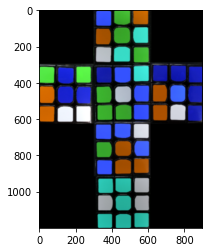

In [129]:
plt.imshow(board)

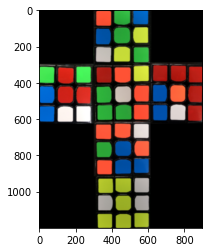

In [130]:
rgbImage = cv2.cvtColor(board, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImage)

In [131]:
color_list = (np.zeros(9,dtype=str),np.zeros(9,dtype=str),np.zeros(9,dtype=str),np.zeros(9,dtype=str),np.zeros(9,dtype=str),np.zeros(9,dtype=str))
color_num_list = (np.zeros(9),np.zeros(9),np.zeros(9),np.zeros(9),np.zeros(9),np.zeros(9))
white_list = np.zeros(9,dtype=str)
red_list = np.zeros(9,dtype=str)
orange_list = np.zeros(9,dtype=str)
green_list = np.zeros(9,dtype=str)
blue_list = np.zeros(9,dtype=str)
yellow_list = np.zeros(9,dtype=str)
mix_list = []

for k in range(0,4):
  for i in range(-1,2):
    for j in range(-1,2):
      R = rgbImage[150+i*100+k*300,450+j*100,0]
      G = rgbImage[150+i*100+k*300,450+j*100,1]
      B = rgbImage[150+i*100+k*300,450+j*100, 2]

      if R >150 and G >150 and B >150 and (abs(int(R) - int(B)) < 40 or abs(int(G) - int(B)) < 40):
        color_list[k][4+3*i+j] = 'w'
        print('white')
      elif R >150 and G >150:
        color_list[k][4+3*i+j] = 'y'
        print('yellow')
      elif int(R) - int(G) > 0 and int(R) - int(B) > 0:
        color_list[k][4+3*i+j] = 'm'
        color_num_list[k][4+3*i+j] = int(R) + int(G) + int(B) 
        mix_list.append(int(R) + int(G) + int(B))
        print('red or orange')
      elif int(B) - int(G) > 0 and int(B) - int(R) > 0:
        color_list[k][4+3*i+j] = 'b'
        print('blue')
      elif int(G) - int(R) > 0 and int(G) - int(B) > 0:
        color_list[k][4+3*i+j] = 'g'
        print('green')
      else:
        color_list[k][4+3*i+j] = 'n'
        print('fail')
      print(rgbImage[150+i*100+k*300,450+j*100])

  print(color_list[k][4])    

for k in range(0,2):
  for i in range(-1,2):
    for j in range(-1,2):
      R = rgbImage[450+i*100,150+j*100+k*600,0]
      G = rgbImage[450+i*100,150+j*100+k*600,1]
      B = rgbImage[450+i*100,150+j*100+k*600, 2]

      if R >150 and G >150 and B >150 and (abs(int(R) - int(B)) < 40 or abs(int(G) - int(B)) < 40):
        color_list[k+4][4+3*i+j] = 'w'
        print('white')
      elif R >150 and G >150 and abs(int(R) - int(G) < 60):
        color_list[k+4][4+3*i+j] = 'y'
        print('yellow')
      elif int(R) - int(G) > 0 and int(R) - int(B) > 0:
        color_list[k+4][4+3*i+j] = 'm'
        color_num_list[k+4][4+3*i+j] = int(R) + int(G) + int(B)
        mix_list.append(int(R) + int(G) + int(B))
        print('red or orange')
      elif int(B) - int(G) > 0 and int(B) - int(R) > 0:
        color_list[k+4][4+3*i+j] = 'b'
        print('blue')
      elif int(G) - int(R) > 0 and int(G) - int(B) > 0:
        color_list[k+4][4+3*i+j] = 'g'
        print('green')
      else:
        color_list[k+4][4+3*i+j] = 'n'
        print('fail')
      print(rgbImage[450+i*100,150+j*100+k*600])

  print(color_list[k+4][4])

mix_list = sorted(mix_list)

for i in range(6):
  for j in range(9):
    if color_num_list[i][j] < (mix_list[8] + mix_list[9]) / 2 and color_num_list[i][j] > 0:
      color_list[i][j] = 'r'
    elif color_num_list[i][j] > 0:
      color_list[i][j] = 'o'

for k in range(6): 
  if color_list[k][4] == 'w':
    white_list = color_list[k]
  elif color_list[k][4] == 'r':
    red_list = color_list[k]
  elif color_list[k][4] == 'o':
    orange_list = color_list[k] 
  elif color_list[k][4] == 'g':
    green_list = color_list[k]
  elif color_list[k][4] == 'b':
    blue_list = color_list[k]
  else: 
    yellow_list = color_list[k]

red or orange
[251  80  50]
green
[ 44 174  60]
blue
[  3  97 187]
blue
[  1  82 166]
green
[ 42 166  56]
yellow
[203 224  59]
white
[198 193 187]
yellow
[199 220  56]
green
[ 48 182  61]
g
red or orange
[170  28  20]
red or orange
[255  83  53]
yellow
[214 227  59]
green
[ 46 178  59]
white
[203 190 181]
red or orange
[255  81  54]
green
[ 45 176  60]
green
[ 43 165  56]
red or orange
[253  78  51]
w
red or orange
[254  89  59]
red or orange
[255  92  61]
white
[231 221 219]
green
[ 44 166  55]
blue
[  0  81 165]
red or orange
[255  98  67]
red or orange
[254  83  55]
blue
[  0  78 161]
blue
[  0  81 167]
b
yellow
[179 198  44]
yellow
[169 189  41]
white
[178 173 170]
white
[173 168 164]
yellow
[154 175  38]
white
[164 160 157]
yellow
[170 189  38]
yellow
[157 176  35]
yellow
[160 182  39]
y
green
[ 68 232  83]
red or orange
[219  37  23]
green
[ 71 244  91]
blue
[  0 107 215]
red or orange
[208  34  25]
red or orange
[224  48  35]
blue
[  0 102 207]
white
[255 246 241]
white
[255 255

white ['r' 'o' 'y' 'g' 'w' 'o' 'g' 'g' 'o']
red ['g' 'r' 'g' 'b' 'r' 'r' 'b' 'w' 'w']
orange ['r' 'r' 'r' 'b' 'o' 'r' 'b' 'w' 'r']
green ['o' 'g' 'b' 'b' 'g' 'y' 'w' 'y' 'g']
blue ['o' 'o' 'w' 'g' 'b' 'o' 'o' 'b' 'b']
yellow ['y' 'y' 'w' 'w' 'y' 'w' 'y' 'y' 'y']


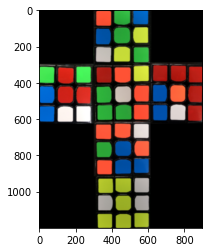

In [132]:
print('white',white_list)
print('red',red_list)
print('orange',orange_list)
print('green',green_list)
print('blue',blue_list)
print('yellow',yellow_list)
plt.imshow(rgbImage)

white ['r' 'o' 'y' 'g' 'w' 'o' 'g' 'g' 'o']
red ['g' 'r' 'g' 'b' 'r' 'r' 'b' 'w' 'w']
orange ['r' 'r' 'r' 'b' 'o' 'r' 'b' 'w' 'r']
green ['o' 'g' 'b' 'b' 'g' 'y' 'w' 'y' 'g']
blue ['o' 'o' 'w' 'g' 'b' 'o' 'o' 'b' 'b']
yellow ['y' 'y' 'w' 'w' 'y' 'w' 'y' 'y' 'y']


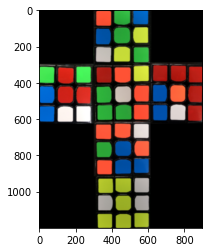

In [133]:
if color_list[0][4] == 'b':#上面が青の場合，上面が緑になるように配列を変換
  white_list = np.flipud(white_list)
  red_list = np.flipud(red_list)
  orange_list = np.flipud(orange_list)
  green_list = np.flipud(green_list)
  blue_list = np.flipud(blue_list)
  yellow_list = np.flipud(yellow_list)

print('white',white_list)
print('red',red_list)
print('orange',orange_list)
print('green',green_list)
print('blue',blue_list)
print('yellow',yellow_list)
plt.imshow(rgbImage)

In [134]:
def front_func(front_face,right_face,left_face,up_face,down_face):
  a = [front_face[0],front_face[1],front_face[2],front_face[5],front_face[8],front_face[7],front_face[6],front_face[3]]
  a_roll = np.roll(a,2)
  front_face[0] = a_roll[0]
  front_face[1] = a_roll[1]
  front_face[2] = a_roll[2]
  front_face[5] = a_roll[3]
  front_face[8] = a_roll[4]
  front_face[7] = a_roll[5]
  front_face[6] = a_roll[6]
  front_face[3] = a_roll[7]

  b =[up_face[6],up_face[7],up_face[8],right_face[0],right_face[3],right_face[6],down_face[2],down_face[1],down_face[0],left_face[8],left_face[5],left_face[2]]
  b_roll = np.roll(b,3)
  up_face[6] = b_roll[0] 
  up_face[7] = b_roll[1]
  up_face[8] = b_roll[2]
  right_face[0] = b_roll[3]
  right_face[3] = b_roll[4]
  right_face[6] = b_roll[5]
  down_face[2] = b_roll[6]
  down_face[1] = b_roll[7]
  down_face[0] = b_roll[8]
  left_face[8] = b_roll[9]
  left_face[5] = b_roll[10]
  left_face[2] = b_roll[11]

  return front_face,right_face,left_face,up_face,down_face

def back_func(back_face,right_face,left_face,up_face,down_face):
  a = [back_face[8],back_face[7],back_face[6],back_face[3],back_face[0],back_face[1],back_face[2],back_face[5]]
  a_roll = np.roll(a,2)
  back_face[8] = a_roll[0]
  back_face[7] = a_roll[1]
  back_face[6] = a_roll[2]
  back_face[3] = a_roll[3]
  back_face[0] = a_roll[4]
  back_face[1] = a_roll[5]
  back_face[2] = a_roll[6]
  back_face[5] = a_roll[7]

  b =[up_face[2],up_face[1],up_face[0],left_face[0],left_face[3],left_face[6],down_face[6],down_face[7],down_face[8],right_face[8],right_face[5],right_face[2]]
  b_roll = np.roll(b,3)
  up_face[2] = b_roll[0] 
  up_face[1] = b_roll[1]
  up_face[0] = b_roll[2]
  left_face[0] = b_roll[3]
  left_face[3] = b_roll[4]
  left_face[6] = b_roll[5]
  down_face[6] = b_roll[6]
  down_face[7] = b_roll[7]
  down_face[8] = b_roll[8]
  right_face[8] = b_roll[9]
  right_face[5] = b_roll[10]
  right_face[2] = b_roll[11]
  
  return back_face,right_face,left_face,up_face,down_face

def right_func(front_face,right_face,back_face,up_face,down_face):
  a = [right_face[0],right_face[1],right_face[2],right_face[5],right_face[8],right_face[7],right_face[6],right_face[3]]
  a_roll = np.roll(a,2)
  right_face[0] = a_roll[0]
  right_face[1] = a_roll[1]
  right_face[2] = a_roll[2]
  right_face[5] = a_roll[3]
  right_face[8] = a_roll[4]
  right_face[7] = a_roll[5]
  right_face[6] = a_roll[6]
  right_face[3] = a_roll[7]

  b =[up_face[8],up_face[5],up_face[2],back_face[8],back_face[5],back_face[2],down_face[8],down_face[5],down_face[2],front_face[8],front_face[5],front_face[2]]
  b_roll = np.roll(b,3)
  up_face[8] = b_roll[0] 
  up_face[5] = b_roll[1]
  up_face[2] = b_roll[2]
  back_face[8] = b_roll[3]
  back_face[5] = b_roll[4]
  back_face[2] = b_roll[5]
  down_face[8] = b_roll[6]
  down_face[5] = b_roll[7]
  down_face[2] = b_roll[8]
  front_face[8] = b_roll[9]
  front_face[5] = b_roll[10]
  front_face[2] = b_roll[11]
  return front_face,right_face,back_face,up_face,down_face

def left_func(front_face,back_face,left_face,up_face,down_face):
  a = [left_face[0],left_face[1],left_face[2],left_face[5],left_face[8],left_face[7],left_face[6],left_face[3]]
  a_roll = np.roll(a,2)
  left_face[0] = a_roll[0]
  left_face[1] = a_roll[1]
  left_face[2] = a_roll[2]
  left_face[5] = a_roll[3]
  left_face[8] = a_roll[4]
  left_face[7] = a_roll[5]
  left_face[6] = a_roll[6]
  left_face[3] = a_roll[7]

  b =[up_face[0],up_face[3],up_face[6],front_face[0],front_face[3],front_face[6],down_face[0],down_face[3],down_face[6],back_face[0],back_face[3],back_face[6]]
  b_roll = np.roll(b,3)
  up_face[0] = b_roll[0] 
  up_face[3] = b_roll[1]
  up_face[6] = b_roll[2]
  front_face[0] = b_roll[3]
  front_face[3] = b_roll[4]
  front_face[6] = b_roll[5]
  down_face[0] = b_roll[6]
  down_face[3] = b_roll[7]
  down_face[6] = b_roll[8]
  back_face[0] = b_roll[9]
  back_face[3] = b_roll[10]
  back_face[6] = b_roll[11]
  return front_face,back_face,left_face,up_face,down_face

def up_func(front_face,right_face,left_face,up_face,back_face):
  a = [up_face[0],up_face[1],up_face[2],up_face[5],up_face[8],up_face[7],up_face[6],up_face[3]]
  a_roll = np.roll(a,2)
  up_face[0] = a_roll[0]
  up_face[1] = a_roll[1]
  up_face[2] = a_roll[2]
  up_face[5] = a_roll[3]
  up_face[8] = a_roll[4]
  up_face[7] = a_roll[5]
  up_face[6] = a_roll[6]
  up_face[3] = a_roll[7]

  b =[back_face[6],back_face[7],back_face[8],right_face[2],right_face[1],right_face[0],front_face[2],front_face[1],front_face[0],left_face[2],left_face[1],left_face[0]]
  b_roll = np.roll(b,3)
  back_face[6] = b_roll[0] 
  back_face[7] = b_roll[1]
  back_face[8] = b_roll[2]
  right_face[2] = b_roll[3]
  right_face[1] = b_roll[4]
  right_face[0] = b_roll[5]
  front_face[2] = b_roll[6]
  front_face[1] = b_roll[7]
  front_face[0] = b_roll[8]
  left_face[2] = b_roll[9]
  left_face[1] = b_roll[10]
  left_face[0] = b_roll[11]
  return front_face,right_face,left_face,up_face,back_face

def down_func(front_face,right_face,left_face,back_face,down_face):
  a = [down_face[0],down_face[1],down_face[2],down_face[5],down_face[8],down_face[7],down_face[6],down_face[3]]
  a_roll = np.roll(a,2)
  down_face[0] = a_roll[0]
  down_face[1] = a_roll[1]
  down_face[2] = a_roll[2]
  down_face[5] = a_roll[3]
  down_face[8] = a_roll[4]
  down_face[7] = a_roll[5]
  down_face[6] = a_roll[6]
  down_face[3] = a_roll[7]

  b =[front_face[6],front_face[7],front_face[8],right_face[6],right_face[7],right_face[8],back_face[2],back_face[1],back_face[0],left_face[6],left_face[7],left_face[8]]
  b_roll = np.roll(b,3)
  front_face[6] = b_roll[0] 
  front_face[7] = b_roll[1]
  front_face[8] = b_roll[2]
  right_face[6] = b_roll[3]
  right_face[7] = b_roll[4]
  right_face[8] = b_roll[5]
  back_face[2] = b_roll[6]
  back_face[1] = b_roll[7]
  back_face[0] = b_roll[8]
  left_face[6] = b_roll[9]
  left_face[7] = b_roll[10]
  left_face[8] = b_roll[11]
  return front_face,right_face,left_face,back_face,down_face


In [135]:
def rotate_func(front_face,back_face,right_face,left_face,up_face,down_face):
  if val[1] == 'f':
    result = front_func(front_face,right_face,left_face,up_face,down_face)
    front_face = result[0]
    right_face = result[1]
    left_face = result[2]
    up_face = result[3]
    down_face = result[4]
  elif val[1] == 'r':
    result = right_func(front_face,right_face,back_face,up_face,down_face)
    front_face = result[0]
    right_face = result[1]
    back_face = result[2]
    up_face = result[3]
    down_face = result[4]
  elif val[1] == 'u':
    result = up_func(front_face,right_face,left_face,up_face,back_face)
    front_face = result[0]
    right_face = result[1]
    left_face = result[2]
    up_face = result[3]
    back_face = result[4]
  elif val[1] == 'l':
    result = left_func(front_face,back_face,left_face,up_face,down_face)
    front_face = result[0]
    back_face = result[1]
    left_face = result[2]
    up_face = result[3]
    down_face = result[4]
  elif val[1] == 'b':
    result = back_func(back_face,right_face,left_face,up_face,down_face)
    back_face = result[0]
    right_face = result[1]
    left_face = result[2]
    up_face = result[3]
    down_face = result[4]
  else:
    result = down_func(front_face,right_face,left_face,back_face,down_face)
    front_face = result[0]
    right_face = result[1]
    left_face = result[2]
    back_face = result[3]
    down_face = result[4]

  return front_face,back_face,right_face,left_face,up_face,down_face

In [136]:
#正面が白色の場合で考える
if val[2] == 'r':#赤の面が正面
  if val[1] == 'f':
    val[1] = 'l'
  elif val[1] == 'b':
    val[1] = 'r'
  elif val[1] == 'r':
    val[1] = 'f'
  elif val[1] == 'l':
    val[1] = 'b'
elif val[2] == 'o':#オレンジの面が正面
  if val[1] == 'f':
    val[1] = 'r'
  elif val[1] == 'b':
    val[1] = 'l'
  elif val[1] == 'r':
    val[1] = 'b'
  elif val[1] == 'l':
    val[1] = 'f'
elif val[2] == 'g':#緑の面が正面
  if val[1] == 'f':
    val[1] = 'u'
  elif val[1] == 'b':
    val[1] = 'd'
  elif val[1] == 'u':
    val[1] = 'b'
  elif val[1] == 'd':
    val[1] = 'f'
elif val[2] == 'b':#青の面が正面
  if val[1] == 'f':
    val[1] = 'd'
  elif val[1] == 'b':
    val[1] = 'u'
  elif val[1] == 'u':
    val[1] = 'f'
  elif val[1] == 'd':
    val[1] = 'b'
elif val[2] == 'y':
  if val[1] == 'f':
    val[1] = 'b'
  elif val[1] == 'b':
    val[1] = 'f'
  elif val[1] == 'u':
    val[1] = 'd'
  elif val[1] == 'd':
    val[1] = 'u'

print(val[1])
result = rotate_func(white_list,yellow_list,orange_list,red_list,green_list,blue_list)

white_list = result[0]
yellow_list = result[1]
orange_list = result[2]
red_list = result[3]
green_list = result[4]
blue_list = result[5]

print('white',white_list)
print('red',red_list)
print('orange',orange_list)
print('green',green_list)
print('blue',blue_list)
print('yellow',yellow_list)

f
white ['g' 'g' 'r' 'g' 'w' 'o' 'o' 'o' 'y']
red ['g' 'r' 'o' 'b' 'r' 'o' 'b' 'w' 'w']
orange ['w' 'r' 'r' 'y' 'o' 'r' 'g' 'w' 'r']
green ['o' 'g' 'b' 'b' 'g' 'y' 'w' 'r' 'g']
blue ['b' 'b' 'r' 'g' 'b' 'o' 'o' 'b' 'b']
yellow ['y' 'y' 'w' 'w' 'y' 'w' 'y' 'y' 'y']


white ['g' 'g' 'r' 'g' 'w' 'o' 'o' 'o' 'y']
red ['g' 'r' 'o' 'b' 'r' 'o' 'b' 'w' 'w']
orange ['w' 'r' 'r' 'y' 'o' 'r' 'g' 'w' 'r']
green ['o' 'g' 'b' 'b' 'g' 'y' 'w' 'r' 'g']
blue ['b' 'b' 'r' 'g' 'b' 'o' 'o' 'b' 'b']
yellow ['y' 'y' 'w' 'w' 'y' 'w' 'y' 'y' 'y']


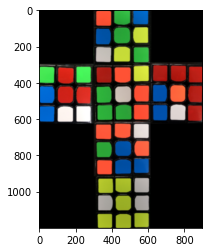

In [137]:
if color_list[0][4] == 'b':#変換した配列を元の配列に戻す
  white_list = np.flipud(white_list)
  red_list = np.flipud(red_list)
  orange_list = np.flipud(orange_list)
  green_list = np.flipud(green_list)
  blue_list = np.flipud(blue_list)
  yellow_list = np.flipud(yellow_list)

print('white',white_list)
print('red',red_list)
print('orange',orange_list)
print('green',green_list)
print('blue',blue_list)
print('yellow',yellow_list)
plt.imshow(rgbImage)